# **Setup**

* https://www.youtube.com/watch?v=6_2hzRopPbQ

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split

# **Data Import**

In [11]:
df = pd.read_csv('Churn.csv')

print(df.shape)
print(df.columns,'\n')
df.sample(5)

(7044, 21)
Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object') 



,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
5611,1320-HTRDR,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.50,220.6,Yes
5325,7901-IIDQV,Male,0,No,No,24,Yes,Yes,DSL,No,...,No,Yes,No,No,One year,No,Bank transfer (automatic),54.60,1242.25,No
6669,2832-KJCRD,Female,0,No,No,38,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.65,3988.5,No
2946,3987-KQDDU,Male,0,No,No,9,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,75.60,661.55,No


# **Data Validation**

In [12]:
df.isna().sum() 

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [14]:
df.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Data Exploration**

<Axes: xlabel='Gender', ylabel='count'>

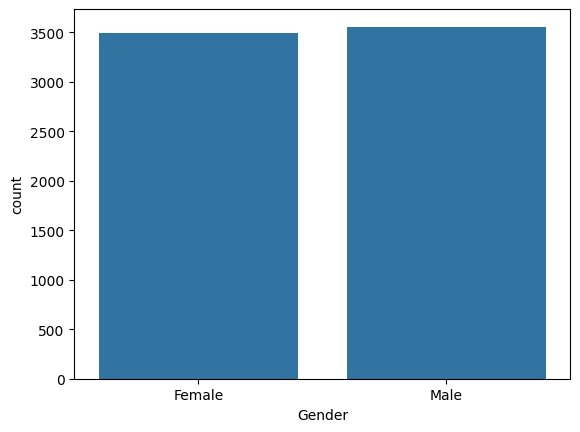

In [22]:
sns.countplot(data=df,x='Gender')

# **Data Processing**

In [26]:
df.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

## **Split Predictor & Target Data**

In [28]:
X = pd.get_dummies(df.drop(['Churn','Customer ID'],axis=1))
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [29]:
X.sample(5)

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
6142,1,52,104.20,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2981,0,72,25.45,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6990,0,20,76.00,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6569,0,8,19.70,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
60,0,72,107.50,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
y.sample(5)

3262    0
2455    0
5718    0
5050    1
5138    0
Name: Churn, dtype: int64

## **Split Train & Test Data**